In [44]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [45]:
df = pd.read_csv('train.csv') 

In [46]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


In [47]:
df.shape

(1058, 35)

In [48]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [49]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [50]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [51]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

0    879
1    179
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


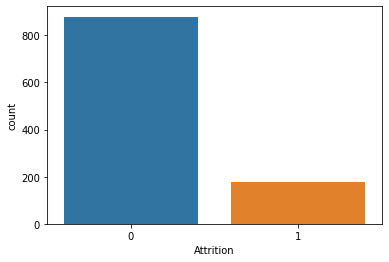

In [52]:
#Visualize this count 
sns.countplot(df['Attrition'])

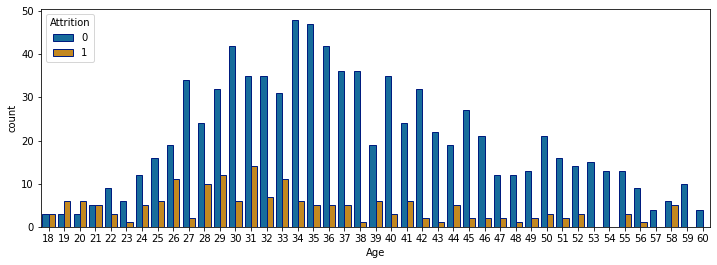

In [53]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

What’s interesting here is that you can see the age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.

Print all of the object data types and print their unique values.

In [54]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    701
Sales                     319
Human Resources            38
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       436
Medical             330
Marketing           122
Technical Degree     96
Other                59
Human Resources      15
Name: EducationField, dtype: int64
_________________________________________________________________
Gender : ['Female' 'Male']
Male      620
Female    438
Name: Gender, dtype: int64
_________________________________________________________________
JobRole

Some columns in the data set I don’t think will be needed for training the machine learning model like the number assignment to the employee (which is just some number identification).

The StandardHours , Over18 & EmployeeCount columns contain only one value in every row, so these columns would not add any additional information to the model. We will remove these columns from the data set.

In [55]:
#Remove unneeded columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [56]:
#Get the correlation of the columns
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172067,0.010507,-0.022753,0.180723,0.029247,0.005901,0.044010,0.506484,-0.020598,...,-0.033426,0.052445,0.010683,0.690428,-0.004970,-0.026016,0.313454,0.210148,0.211967,0.194128
Attrition,-0.172067,1.000000,-0.051992,0.078074,-0.032631,-0.132848,-0.017524,-0.150196,-0.169201,-0.091751,...,0.007755,-0.053417,-0.164228,-0.177137,-0.047859,-0.059556,-0.135134,-0.158757,-0.031944,-0.155962
DailyRate,0.010507,-0.051992,1.000000,0.027120,-0.039805,0.023005,0.038572,0.058871,0.003042,0.026694,...,0.016809,-0.013600,0.044321,0.024266,-0.000817,-0.057479,-0.047141,-0.001487,-0.047469,-0.038338
DistanceFromHome,-0.022753,0.078074,0.027120,1.000000,0.006185,-0.020197,0.048494,0.051250,-0.024838,0.003862,...,0.030428,0.010755,0.048544,-0.025465,-0.005176,-0.051469,-0.028687,-0.005367,-0.009304,-0.005352
Education,0.180723,-0.032631,-0.039805,0.006185,1.000000,-0.002332,0.026237,0.034317,0.094922,0.001611,...,-0.043008,0.008438,-0.005877,0.131213,-0.039092,0.010054,0.055830,0.070081,0.064578,0.080093
EnvironmentSatisfaction,0.029247,-0.132848,0.023005,-0.020197,-0.002332,1.000000,-0.064578,0.012431,0.016439,0.006159,...,-0.046762,-0.003999,0.021579,0.007392,-0.031968,0.017335,0.002463,0.027112,0.022197,0.002739
HourlyRate,0.005901,-0.017524,0.038572,0.048494,0.026237,-0.064578,1.000000,0.047156,-0.021084,-0.073877,...,-0.011632,-0.012714,0.021539,-0.017238,-0.017006,-0.001058,-0.022893,-0.035471,-0.049503,-0.031806
JobInvolvement,0.044010,-0.150196,0.058871,0.051250,0.034317,0.012431,0.047156,1.000000,-0.008003,-0.029948,...,-0.015850,0.049298,0.043353,-0.007514,-0.030002,-0.029776,-0.011757,0.009100,-0.017878,0.032704
JobLevel,0.506484,-0.169201,0.003042,-0.024838,0.094922,0.016439,-0.021084,-0.008003,1.000000,-0.029369,...,-0.061532,0.026113,0.019655,0.786925,-0.006301,0.037285,0.546310,0.410976,0.361694,0.380084
JobSatisfaction,-0.020598,-0.091751,0.026694,0.003862,0.001611,0.006159,-0.073877,-0.029948,-0.029369,1.000000,...,-0.029179,-0.002660,0.023664,-0.043132,0.015052,-0.063735,-0.029912,-0.022945,-0.030463,-0.049086


Let’s get a better visual of the correlation by using a heat map.

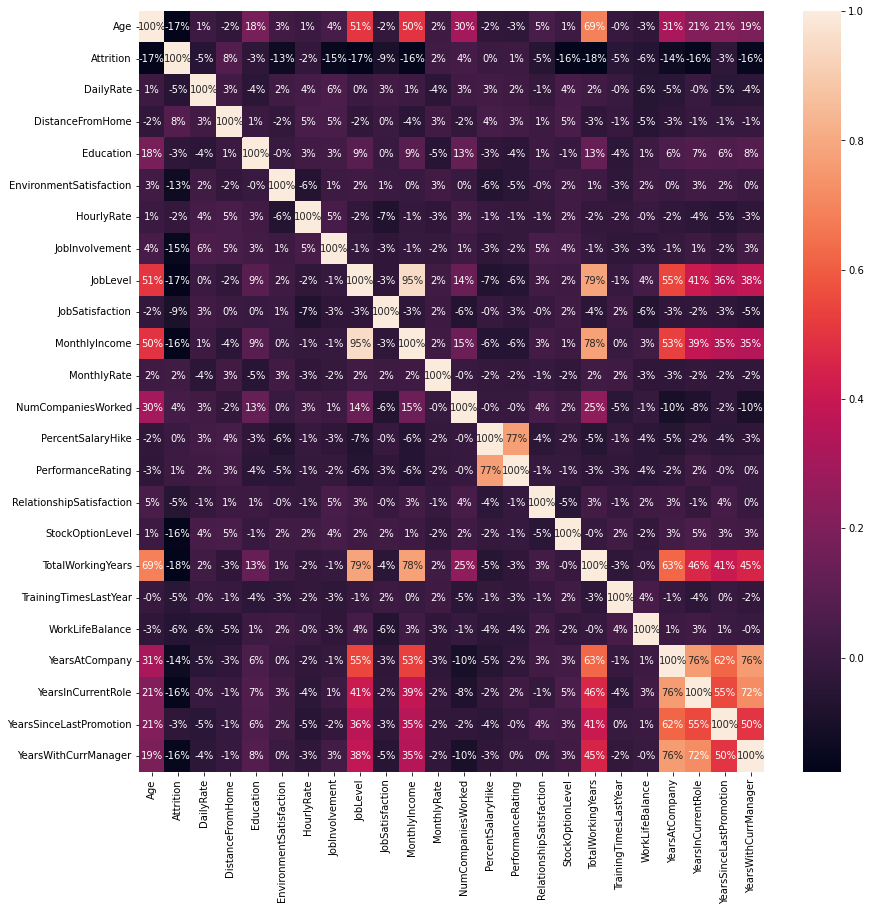

In [57]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

Now let’s prepare the data for the model. We will first transform non-numeric columns to numerical columns.

In [58]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  """


Next I am going to create a new column to store the age values in. This is only to put the age values at the end of the data set. Then I will remove the column age from the front of the data set so that the target column is first.

Last but not least I will show the new data set.

In [59]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,507,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,89,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,660,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,671,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,247,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0,2,151,1,0,1,1,1,1,63,...,0,1,13,2,1,12,9,2,8,39
1054,0,2,725,1,6,3,1,2,1,5,...,1,2,29,3,2,8,7,0,7,31
1055,0,1,369,1,14,2,3,1,1,41,...,3,2,16,3,1,14,8,6,9,16
1056,1,1,728,2,0,2,5,0,1,62,...,3,1,5,3,3,3,2,1,2,10


Split the data into independent ‘X’ and dependent ‘Y’ data sets.

In [60]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [61]:
X

array([[  2, 507,   2, ...,   0,   5,  23],
       [  1,  89,   1, ...,   1,   7,  31],
       [  2, 660,   1, ...,   0,   0,  19],
       ...,
       [  1, 369,   1, ...,   6,   9,  16],
       [  1, 728,   2, ...,   1,   2,  10],
       [  1,   6,   2, ...,   0,   0,  11]])

In [62]:
Y

array([1, 0, 1, ..., 0, 1, 1])

In [63]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [64]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                         Random Forest": RandomForestClassifier()                                      
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + " trained.")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Random Forest trained.


In [65]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test) * 100))

                   Logistic Regression: 85.66%
                   K-Nearest Neighbors: 82.64%
                         Decision Tree: 73.96%
Support Vector Machine (Linear Kernel): 84.53%
   Support Vector Machine (RBF Kernel): 84.53%
                         Random Forest: 86.79%
